In [10]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import random 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange
from mpl_toolkits.mplot3d import Axes3D

In [11]:
class CliffWalking:
    
    def __init__(self):
        
        self.grid_rows = 4
        self.grid_cols = 12
        self.start_state = [3,0]
        self.goal_state = [3,11]
        self.UP,self.DOWN,self.LEFT,self.RIGHT = np.array([-1,0]), np.array([1,0]),\
                                                 np.array([0,-1]), np.array([0,1])
        self.actions = [self.UP,self.DOWN,self.LEFT,self.RIGHT]
        self.actions_len = len(self.actions)
        self.epsilon = 0.1
        self.gamma = 1.0
        self.alpha = 0.5
        self.re_init()
        
        
    def re_init(self):
        self.Q_SARSA = np.zeros((self.grid_rows, self.grid_cols, self.actions_len))
        self.Q_Qlearning = np.zeros((self.grid_rows, self.grid_cols, self.actions_len))
        
        
    def step(self, state, action):
        #print(action,state)
        i, j = state
        #print(i,j)
        next_state = state + action
        #print(type(next_state))
        next_i, next_j = next_state
        if next_i < 0 or next_i >= self.grid_rows or next_j < 0 or next_j >= self.grid_cols:
            next_state = state

        reward = -1
        #print(type(action))
        if (list(action) == list(self.RIGHT) and list(state) == list(self.start_state)) or \
        (list(action) == list(self.DOWN) and i == 2 and 1 <= j <= 10):
            reward = -100
            next_state = self.start_state

        next_state = list(next_state)
        return next_state, reward
    
    
    def chooseEpsGreedyAction(self,state,Q_vals):
    
        val = np.random.rand()
        if val < self.epsilon:
             return np.random.choice(self.actions_len)
        else:
            i , j = state
            values = Q_vals[i,j,:]
            #print(values)
            return np.argmax(values)
            #Q_max = np.max(values)
            #print(Q_max)
            #return np.random.choice(np.where(values == Q_max)[0])

        
    def sarsa(self):
        
        state, rewards = self.start_state, 0.0
        action = self.chooseEpsGreedyAction(state, self.Q_SARSA)
        
        while state != self.goal_state:
            next_state, reward = self.step(state, self.actions[action])
            next_action = self.chooseEpsGreedyAction(next_state, self.Q_SARSA)
            rewards += reward
            target = self.Q_SARSA[next_state[0], next_state[1], next_action]
            target *= self.gamma
            i,j = state
            #print(action, reward)
            #print(target)
            self.Q_SARSA[i, j, action] += self.alpha * (reward + target - self.Q_SARSA[i, j, action])
            state = next_state
            action = next_action
            
        return rewards
    
    
    def qLearning(self):
        
        state = self.start_state
        rewards = 0.0
        while state != self.goal_state:
            action = self.chooseEpsGreedyAction(state, self.Q_Qlearning)
            next_state, reward = self.step(state, self.actions[action])
            rewards += reward
             #QLearning update
            i , j = state
            next_i, next_j = next_state
            self.Q_Qlearning[i, j, action] += self.alpha * (reward + self.gamma * \
                                              np.max(self.Q_Qlearning[next_i, next_j, :])\
                                                - self.Q_Qlearning[i, j, action])
            state = next_state
        return rewards
    

    def compare(self, num_episodes,runs):
        
        rewards_SARSA, rewards_Qlearning = np.zeros(num_episodes), np.zeros(num_episodes)

        for run in trange(runs):
            self.re_init()
            for i in range(0, num_episodes):
                rewards_SARSA[i] += self.sarsa()
                rewards_Qlearning[i] += self.qLearning()

        rewards_SARSA /= runs
        rewards_Qlearning /= runs

        plt.plot(rewards_SARSA, label='Sarsa')
        plt.plot(rewards_Qlearning, label='Q-learning')
        plt.xlabel('Episodes')
        plt.ylabel('Sum of rewards during episode')
        plt.ylim([-100, 0])
        plt.legend()
        plt.show()

100%|██████████| 100/100 [00:36<00:00,  2.50it/s]


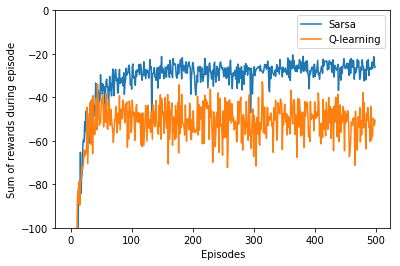

In [12]:
#if __name__ == '__main__':
cliff = CliffWalking()
num_episodes, runs = 500, 100 #500,50
cliff.compare(num_episodes, runs)